In [2]:
import uproot3
import awkward as ak
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.patches as mpatches

from matplotlib.collections import PatchCollection
import matplotlib


ModuleNotFoundError: No module named 'uproot3'

In [2]:
fName = "root://cmseos.fnal.gov//store/user/dnoonan/HGCAL_Concentrator/TTbar_v11/ntuple_ttbar_D49_1120pre1_PU200_eolupdate_qua_20200723_1.root"

_file = uproot.open(fName)
_tree = _file['hgcalTriggerNtuplizer/HGCalTriggerNtuple']

branches = ['hgcdigi_zside','hgcdigi_layer','hgcdigi_waferu','hgcdigi_waferv',
            'hgcdigi_cellu','hgcdigi_cellv','hgcdigi_wafertype',
            'hgcdigi_data_BX2','hgcdigi_isadc_BX2','hgcdigi_toa_BX2',
            'hgcdigi_data_BX1','hgcdigi_isadc_BX1']

In [3]:
Nevents=15
arrays = _tree.arrays(branches,cut="hgcdigi_layer<25",entry_stop=Nevents)


In [4]:
df = ak.to_pandas(arrays)
df.columns = [x[8:] for x in branches]
df.reset_index(inplace=True)

df.loc[df.isadc_BX2==0,'data_BX2'] = 999
df.loc[df.isadc_BX1==0,'data_BX1'] = 999

df['WaferID'] = ((df.waferv+50) + 
                 (df.waferu+50)*100 + 
                 df.layer*10000 + 
                 df.entry*1000000)*df.zside

df['CellID'] = df.cellv + df.cellu*100

In [5]:
layerCut=df.layer<25
x = df[(df.wafertype==0)&layerCut].pivot(index='WaferID',columns='CellID',values='data_BX1').fillna(0)
y0 = x.values.flatten()
x = df[(df.wafertype==1)&layerCut].pivot(index='WaferID',columns='CellID',values='data_BX1').fillna(0)
y1 = x.values.flatten()
x = df[(df.wafertype==2)&layerCut].pivot(index='WaferID',columns='CellID',values='data_BX1').fillna(0)
y2 = x.values.flatten()


x = df[(df.wafertype==0)&layerCut].pivot(index='WaferID',columns='CellID',values='data_BX2').fillna(0)
y3 = x.values.flatten()
x = df[(df.wafertype==1)&layerCut].pivot(index='WaferID',columns='CellID',values='data_BX2').fillna(0)
y4 = x.values.flatten()
x = df[(df.wafertype==2)&layerCut].pivot(index='WaferID',columns='CellID',values='data_BX2').fillna(0)
y5 = x.values.flatten()

y = [[y0,y1,y2],
     [y3,y4,y5]]

thickness=[120,200,300]


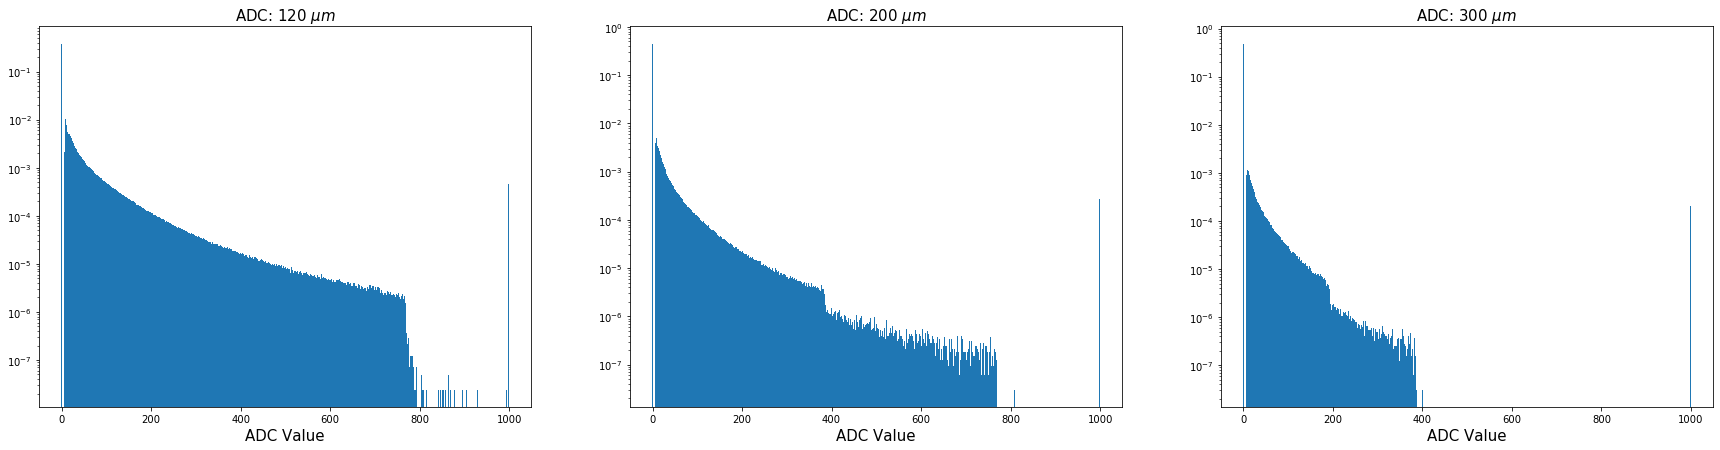

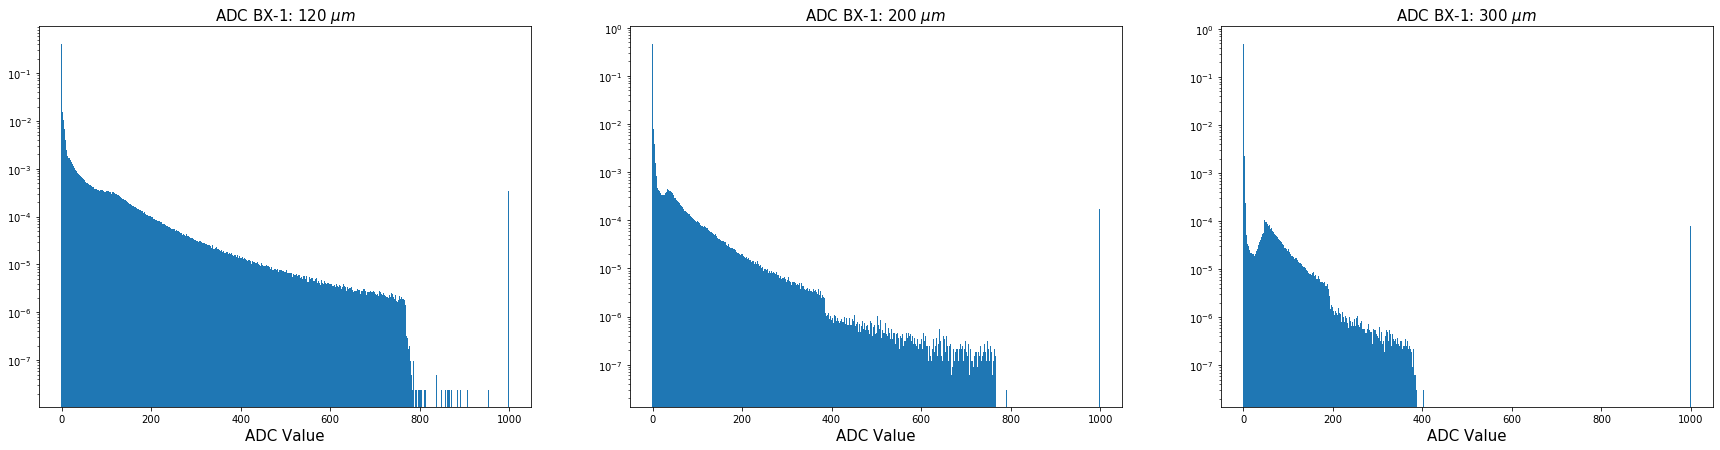

In [6]:
f,ax = plt.subplots(1,3,figsize=(30,7))
for i in range(3):
    ax[i].hist(y[1][i],bins=np.arange(-1,1001,2),density=True);
    ax[i].set_xlabel('ADC Value',fontsize=15)
    ax[i].set_yscale('log')
    ax[i].set_title(f'ADC: {thickness[i]} $\mu m$',fontsize=15)
    
f,ax = plt.subplots(1,3,figsize=(30,7))
for i in range(3):
    ax[i].hist(y[0][i],bins=np.arange(-1,1001,2),density=True);
    ax[i].set_xlabel('ADC Value',fontsize=15)
    ax[i].set_yscale('log')
    ax[i].set_title(f'ADC BX-1: {thickness[i]} $\mu m$',fontsize=15)

In [7]:
bins=np.arange(1001)
def getEff(y,bins=bins):
    counts,bins=np.histogram(y,bins=bins)
    return counts/len(y), counts/(y>0).sum()

eff0, effHit0 = getEff(y[1][0])
eff1, effHit1 = getEff(y[1][1])
eff2, effHit2 = getEff(y[1][2])

eff =[eff0,eff1,eff2]
effHit = [effHit0,effHit1,effHit2]

eff0, effHit0 = getEff(y[0][0])
eff1, effHit1 = getEff(y[0][1])
eff2, effHit2 = getEff(y[0][2])
effBXm1 =[eff0,eff1,eff2]
effBXm1Hit = [effHit0,effHit1,effHit2]


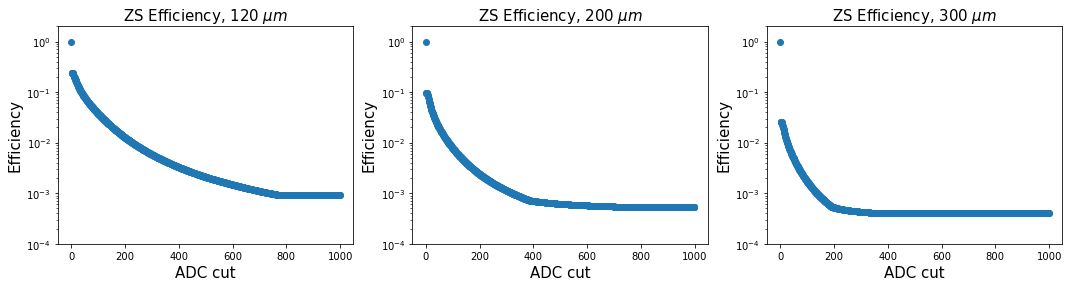

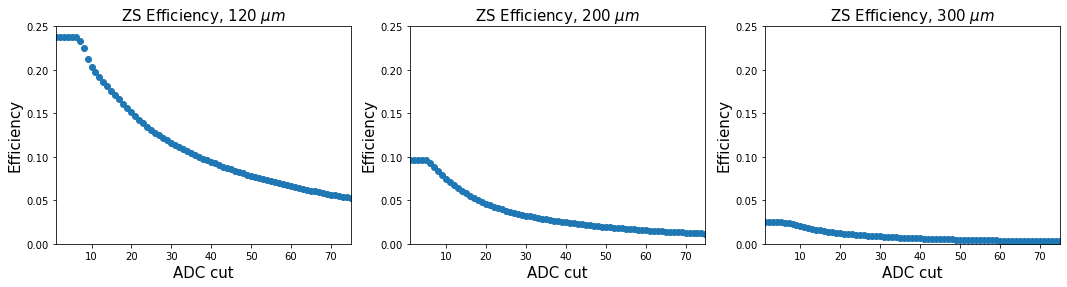

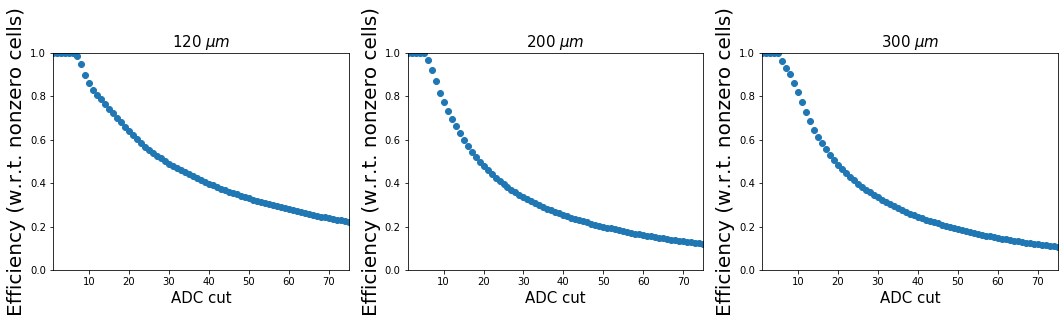

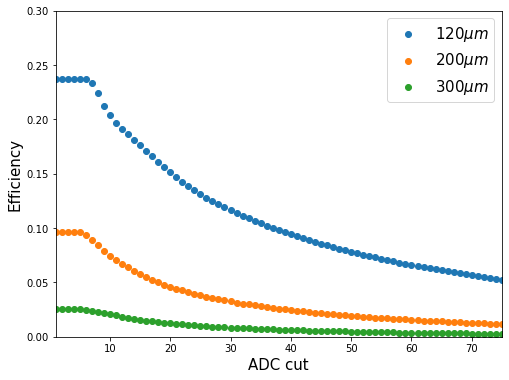

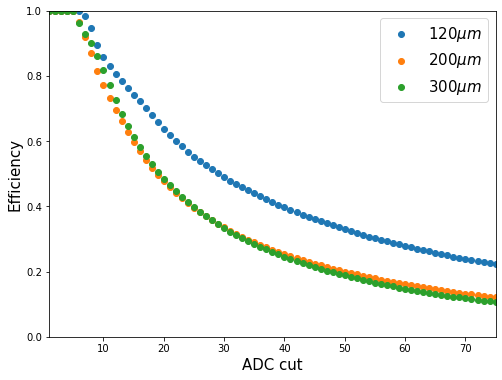

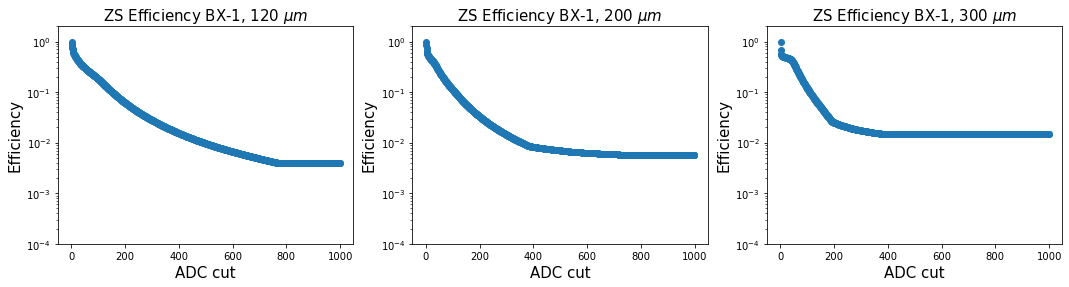

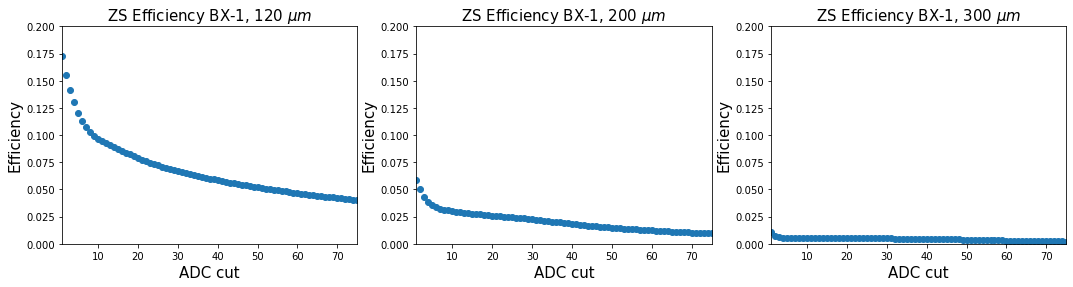

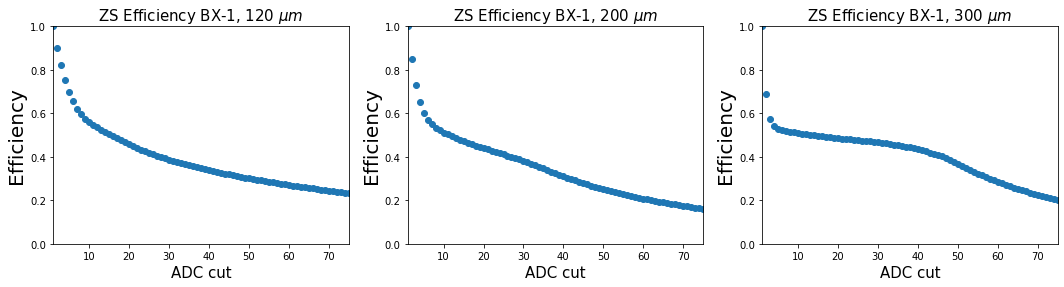

In [8]:
f,ax = plt.subplots(1,3,figsize=(18,4))

for i in range(3):
    ax[i].scatter(bins[-2::-1],np.cumsum(eff[i][::-1]))
    ax[i].set_xlabel('ADC cut',fontsize=15)
    ax[i].set_ylabel('Efficiency',fontsize=15)
    ax[i].set_ylim(1e-4,2)
    ax[i].set_yscale('log')
    ax[i].set_title(f'ZS Efficiency, {thickness[i]} $\mu m$',fontsize=15)

f,ax = plt.subplots(1,3,figsize=(18,4))

for i in range(3):
    ax[i].scatter(bins[-2::-1],np.cumsum(eff[i][::-1]))
    ax[i].set_xlabel('ADC cut',fontsize=15)
    ax[i].set_ylabel('Efficiency',fontsize=15)
    ax[i].set_ylim(0,.25)
    ax[i].set_xlim(1,75)
    ax[i].set_title(f'ZS Efficiency, {thickness[i]} $\mu m$',fontsize=15)

f,ax = plt.subplots(1,3,figsize=(18,4))

for i in range(3):
    ax[i].scatter(bins[-2::-1],np.cumsum(effHit[i][::-1]))
    ax[i].set_xlabel('ADC cut',fontsize=15)
    ax[i].set_ylabel('Efficiency (w.r.t. nonzero cells)',fontsize=20)    
    ax[i].set_ylim(0,1.)
    ax[i].set_xlim(1,75)
    ax[i].set_title(f'{thickness[i]} $\mu m$',fontsize=15)

fig,ax = plt.subplots(1,1,figsize=(8,6))
for i in range(3):
    ax.scatter(bins[-2::-1],np.cumsum(eff[i][::-1]),label=f'${thickness[i]} \mu m$')
    ax.set_xlabel('ADC cut',fontsize=15)
    ax.set_ylabel('Efficiency',fontsize=15)
    ax.set_ylim(0,.3)
    ax.set_xlim(1,75)
plt.legend(fontsize=15)

fig,ax = plt.subplots(1,1,figsize=(8,6))
for i in range(3):
    ax.scatter(bins[-2::-1],np.cumsum(effHit[i][::-1]),label=f'${thickness[i]} \mu m$')
    ax.set_xlabel('ADC cut',fontsize=15)
    ax.set_ylabel('Efficiency',fontsize=15)
    ax.set_ylim(0,1.)
    ax.set_xlim(1,75)
plt.legend(fontsize=15)


f,ax = plt.subplots(1,3,figsize=(18,4))

for i in range(3):
    ax[i].scatter(bins[-2::-1],np.cumsum(effBXm1Hit[i][::-1]))
    ax[i].set_xlabel('ADC cut',fontsize=15)
    ax[i].set_ylabel('Efficiency',fontsize=15)
    ax[i].set_ylim(1e-4,2)
    ax[i].set_yscale('log')
    ax[i].set_title(f'ZS Efficiency BX-1, {thickness[i]} $\mu m$',fontsize=15)

f,ax = plt.subplots(1,3,figsize=(18,4))

for i in range(3):
    ax[i].scatter(bins[-2::-1],np.cumsum(effBXm1[i][::-1]))
    ax[i].set_xlabel('ADC cut',fontsize=15)
    ax[i].set_ylabel('Efficiency',fontsize=15)
    ax[i].set_ylim(0,.2)
    ax[i].set_xlim(1,75)
    ax[i].set_title(f'ZS Efficiency BX-1, {thickness[i]} $\mu m$',fontsize=15)

f,ax = plt.subplots(1,3,figsize=(18,4))
for i in range(3):
    ax[i].scatter(bins[-2::-1],np.cumsum(effBXm1Hit[i][::-1]))
    ax[i].set_xlabel('ADC cut',fontsize=15)
    ax[i].set_ylabel('Efficiency',fontsize=20)    
    ax[i].set_ylim(0,1.)
    ax[i].set_xlim(1,75)
    ax[i].set_title(f'ZS Efficiency BX-1, {thickness[i]} $\mu m$',fontsize=15)


In [9]:
Nevents=250

dfList = []
step_size=25
for i,x in enumerate(_tree.iterate(branches,cut="hgcdigi_layer==9",step_size=step_size,entry_stop=Nevents)):
    y = ak.to_pandas(x)
    y.index.set_levels(y.index.levels[0]+i*step_size,0,inplace=True)    
    dfList.append(y)
df = pd.concat(dfList)
del dfList
# arrays = _tree.arrays(branches,entry_stop=Nevents)

# cut = arrays.hgcdigi_layer==9
# df = ak.to_pandas(arrays[cut])

df.columns = [x[8:] for x in branches]
df.reset_index(inplace=True)

df.loc[df.isadc_BX2==0,'data_BX2'] = 999
df.loc[df.isadc_BX1==0,'data_BX1'] = 999

df['WaferID'] = ((df.waferv+50) + 
                 (df.waferu+50)*100 + 
                 df.layer*10000 + 
                 df.entry*1000000)*df.zside

df['CellID'] = df.cellv + df.cellu*100

In [10]:
def getOcc(df,waferType):
    x = df[df.wafertype==waferType].pivot(index='WaferID',columns='CellID',values='data_BX2').fillna(0)
    occ = pd.DataFrame(index=x.index)
    occ['Max'] = x[x<900].max(axis=1)
    occ['Occ0'] = (x>=5).sum(axis=1)
    occ['Occ10'] = (x>=10).sum(axis=1)
    return occ.astype(int)

def getOcc_BXm1(df,waferType):
    x = df[df.wafertype==waferType].pivot(index='WaferID',columns='CellID',values='data_BX1').fillna(0)
    occ = pd.DataFrame(index=x.index)
    occ['Occ0'] = (x>=5).sum(axis=1)
    occ['Occ10'] = (x>=10).sum(axis=1)
    occ['Occ25'] = (x>=25).sum(axis=1)
    return occ.astype(int)

occ = pd.concat([getOcc(df,0), getOcc(df,1), getOcc(df,2)]).reset_index()
occBXm1 = pd.concat([getOcc_BXm1(df,0), getOcc_BXm1(df,1), getOcc_BXm1(df,2)]).reset_index()


In [11]:
# x = df[df.wafertype==0].pivot(index='WaferID',columns='CellID',values='data_BX2').fillna(0)
# x1 = df[df.wafertype==1].pivot(index='WaferID',columns='CellID',values='data_BX2').fillna(0)
# x2 = df[df.wafertype==2].pivot(index='WaferID',columns='CellID',values='data_BX2').fillna(0)

# x['Max'] = x[x<900].max(axis=1)
# x['Occ0'] = (x>=5).sum(axis=1)
# x['Occ10'] = (x>=10).sum(axis=1)

# x1['Max'] = x1[x1<900].max(axis=1)
# x1['Occ0'] = (x1>=5).sum(axis=1)
# x1['Occ10'] = (x1>=10).sum(axis=1)

# x2['Max'] = x2[x2<900].max(axis=1)
# x2['Occ0'] = (x2>=5).sum(axis=1)
# x2['Occ10'] = (x2>=10).sum(axis=1)

# occ = pd.concat([x[['Max','Occ0','Occ10']], x1[['Max','Occ0','Occ10']], x2[['Max','Occ0','Occ10']]]).reset_index()

# x = df[df.wafertype==0].pivot(index='WaferID',columns='CellID',values='data_BX1').fillna(0)
# x1 = df[df.wafertype==1].pivot(index='WaferID',columns='CellID',values='data_BX1').fillna(0)
# x2 = df[df.wafertype==2].pivot(index='WaferID',columns='CellID',values='data_BX1').fillna(0)

# x['Occ0'] = (x>5).sum(axis=1)
# x['Occ10'] = (x>=10).sum(axis=1)
# x['Occ25'] = (x>=25).sum(axis=1)

# x1['Occ0'] = (x1>=5).sum(axis=1)
# x1['Occ10'] = (x1>=10).sum(axis=1)
# x1['Occ25'] = (x1>=25).sum(axis=1)

# x2['Occ0'] = (x2>=5).sum(axis=1)
# x2['Occ10'] = (x2>=10).sum(axis=1)
# x2['Occ25'] = (x2>=25).sum(axis=1)

# occBXm1 = pd.concat([x[['Occ25','Occ0','Occ10']], x1[['Occ25','Occ0','Occ10']], x2[['Occ25','Occ0','Occ10']]]).reset_index()

In [12]:
#df['WaferID'] = (df.waferv + df.waferu*100 + df.layer*10000 + df.entry*1000000)*df.zside

a = occ.WaferID.astype(int)
occ['zside'] = (a/abs(a)).astype(int)
a = (a/occ.zside).astype(int)

occ['waferv'] = (a/1).astype(int)%100 - 50
occ['waferu'] = (a/100).astype(int)%100 - 50
occ['layer']  = (a/10000).astype(int)%100
occ['entry']  = (a/1000000).astype(int)%100


a = occBXm1.WaferID.astype(int)
occBXm1['zside'] = (a/abs(a)).astype(int)
a = (a/occBXm1.zside).astype(int)

occBXm1['waferv'] = (a/1).astype(int)%100 - 50
occBXm1['waferu'] = (a/100).astype(int)%100 - 50
occBXm1['layer']  = (a/10000).astype(int)%100
occBXm1['entry']  = (a/1000000).astype(int)%100




In [13]:
#get list of wedges, and assign x and y positions for drawing maps
wedges = occ.groupby(['layer','waferu','waferv']).any()[['Occ0']].reset_index()

wedges['y'] = wedges.waferv
wedges['x'] = 0
wedges.loc[:,'x'] = (2+wedges.y-2*wedges.waferu)-2
###wedges.y *= 1.5/2
wedges.x *= -3**.5/3
# wedges.y *= 1.5/2
# wedges.x *= -3**.5/4
wedges.set_index(['layer','waferu','waferv'],inplace=True)


wedges['Occ0'] = occ.groupby(['layer','waferu','waferv'])['Occ0'].sum()/(2*Nevents)
wedges['Max'] = occ.groupby(['layer','waferu','waferv'])['Max'].max()
wedges['Occ10'] = occ.groupby(['layer','waferu','waferv'])['Occ10'].sum()/(2*Nevents)

wedges['type'] = df.groupby(['layer','waferu','waferv'])['wafertype'].mean()

wedges['Eff0'] = np.where(wedges.type==0,wedges.Occ0/432,wedges.Occ0/192)
wedges['Eff10'] = np.where(wedges.type==0,wedges.Occ10/432,wedges.Occ10/192)

wedges['BXm1_Occ0'] = occBXm1.groupby(['layer','waferu','waferv'])['Occ0'].sum()/(2*Nevents)
wedges['BXm1_Occ10'] = occBXm1.groupby(['layer','waferu','waferv'])['Occ10'].sum()/(2*Nevents)
wedges['BXm1_Occ25'] = occBXm1.groupby(['layer','waferu','waferv'])['Occ25'].sum()/(2*Nevents)

wedges['BXm1_Eff0']  = wedges.BXm1_Occ0/wedges.Occ0
wedges['BXm1_Eff10'] = wedges.BXm1_Occ10/wedges.Occ0
wedges['BXm1_Eff25'] = wedges.BXm1_Occ25/wedges.Occ0

# Count TOT and TOA cells, and divide by events and cells per module
df['istot_BX2'] = 1-df.isadc_BX2
wedges['OccTOT'] = df.groupby(['layer','waferu','waferv'])['istot_BX2'].sum()/(2*Nevents)
wedges['OccTOA'] = df.groupby(['layer','waferu','waferv'])['toa_BX2'].sum()/(2*Nevents)
wedges['EffTOT_total'] = np.where(wedges.type==0,wedges.OccTOT/432,wedges.OccTOT/192)
wedges['EffTOA_total'] = np.where(wedges.type==0,wedges.OccTOA/432,wedges.OccTOA/192)
wedges['EffTOT_rel'] = wedges.OccTOT/wedges.Occ0
wedges['EffTOA_rel'] = wedges.OccTOA/wedges.Occ0

wedges.fillna(0,inplace=True)

In [14]:
wedges.Occ0

layer  waferu  waferv
9      -11     -8        0.014
               -7        0.336
               -6        0.710
               -5        0.628
               -4        0.420
               -3        0.020
       -10     -9        0.654
               -8        2.366
               -7        3.732
               -6        4.446
               -5        4.668
               -4        4.298
               -3        3.682
               -2        2.550
               -1        0.756
       -9      -10       0.616
               -9        3.352
               -8        4.814
               -7        5.506
               -6        6.430
               -5        7.144
               -4        7.224
               -3        6.728
               -2        5.588
               -1        4.714
                0        3.036
                1        0.844
       -8      -11       0.008
               -10       2.198
               -9        4.898
                         ...  
        8       9

In [15]:
Labels ={'Eff0':{'Title':'ZS Efficiency (5 ADC Threshold), Layer %i',
                'colorLabel':'Avg. Occ.',
                'nDec':2,
                'zMax':1},
         'Eff10':{'Title':'ZS Efficiency (10 ADC Threshold), Layer %i',
                 'colorLabel':'Avg. Occ.',
                 'nDec':2,
                 'zMax':1},
         'BXm1_Eff0':{'Title':'ZS Efficiency BX-1 (5 ADC Threshold), Layer %i',
                 'colorLabel':'Avg. Occ.',
                 'nDec':2,
                 'zMax':1},
         'BXm1_Eff10':{'Title':'ZS Efficiency BX-1 (10 ADC Threshold), Layer %i',
                 'colorLabel':'Avg. Occ.',
                 'nDec':2,
                 'zMax':1},
         'BXm1_Eff25':{'Title':'ZS Efficiency BX-1 (25 ADC Threshold), Layer %i',
                 'colorLabel':'Avg. Occ.',
                 'nDec':2,
                 'zMax':1},
         'Occ0':{'Title':'Average Occupancy (Non-Zero Cells), Layer %i',
                'colorLabel':'Avg. Occ.',
                'nDec':0,
                'zMax':1},
         'Occ10':{'Title':'Average Occupancy (10 ADC Threshold), Layer %i',
                 'colorLabel':'Avg. Occ.',
                 'nDec':0,
                 'zMax':1},
         'BXm1_Occ0':{'Title':'Average Occupancy BX-1 (0 ADC Threshold), Layer %i',
                 'colorLabel':'Avg. Occ.',
                 'nDec':0,
                 'zMax':1},
         'BXm1_Occ10':{'Title':'Average Occupancy BX-1 (10 ADC Threshold), Layer %i',
                 'colorLabel':'Avg. Occ.',
                 'nDec':0,
                 'zMax':1},
         'BXm1_Occ25':{'Title':'Average Occupancy BX-1 (25 ADC Threshold), Layer %i',
                 'colorLabel':'Avg. Occ.',
                 'nDec':0,
                 'zMax':1},
         'OccTOT':{'Title':'Average TOT Occupancy, Layer %i',
                 'colorLabel':'Avg. TOT Occupancy',
                 'nDec':2,
                 'zMax':1},
         'OccTOA':{'Title':'Average TOA Occupancy, Layer %i',
                 'colorLabel':'Avg. TOA Occupancy',
                 'nDec':1,
                 'zMax':1},
         'EffTOT_total':{'Title':'TOT Efficiency, Layer %i',
                 'colorLabel':'Avg. TOT Efficiency',
                 'nDec':2,
                 'zMax':1},
         'EffTOA_total':{'Title':'TOA Efficiency, Layer %i',
                 'colorLabel':'Avg. TOA Efficiency',
                 'nDec':2,
                 'zMax':1},
         'EffTOT_rel':{'Title':'TOT Relative Efficiency, Layer %i',
                 'colorLabel':'Avg. TOT Efficiency',
                 'nDec':2,
                 'zMax':1},
         'EffTOA_rel':{'Title':'TOA Relative Efficiency, Layer %i',
                 'colorLabel':'Avg. TOA Efficiency',
                 'nDec':2,
                 'zMax':1},
         'Max':{'Title':'Maximum ADC Value, Layer %i',
                 'colorLabel':'Max Occ.',
                 'nDec':0,
                 'zMax':1},
         'type':{'Title':'Wafer Type, Layer %i, (0/1/2 corresponds to 120/200/300 $\mu m$)',
                 'colorLabel':'Max Occ.',
                 'nDec':0,
                 'zMax':1},
        }


In [16]:
def makeLayerPlot(wedge, var):
    patches = []
    for w in wedge.index:
        patches.append(mpatches.RegularPolygon((wedge.loc[w].x,wedge.loc[w].y),6,.95/1.5))
    waferCollection = PatchCollection(patches,cmap=matplotlib.cm.coolwarm)
    waferCollection.set_array(wedge[var].values)
    # waferCollection.set_clim([0,Labels[var]['zMax']])
    fig, ax = plt.subplots(figsize=(15,15))
    ax.add_collection(waferCollection)
    plt.axis([-12,12,-12,12])
    plt.title(Labels[var]['Title']%layer,fontsize=24)
    for x,y,d in wedge[['x','y',var]].values:
        l = f'%.{Labels[var]["nDec"]}f'%d
        if 'EffTOT' in var: l = '{:.0e}'.format(d).replace('e-0','e-').replace('0e+00','0')
        l = l.replace('-0.00', 'x').replace('-1e-6','x')
        plt.text(x,y,l,fontsize=14,horizontalalignment='center',verticalalignment='center')


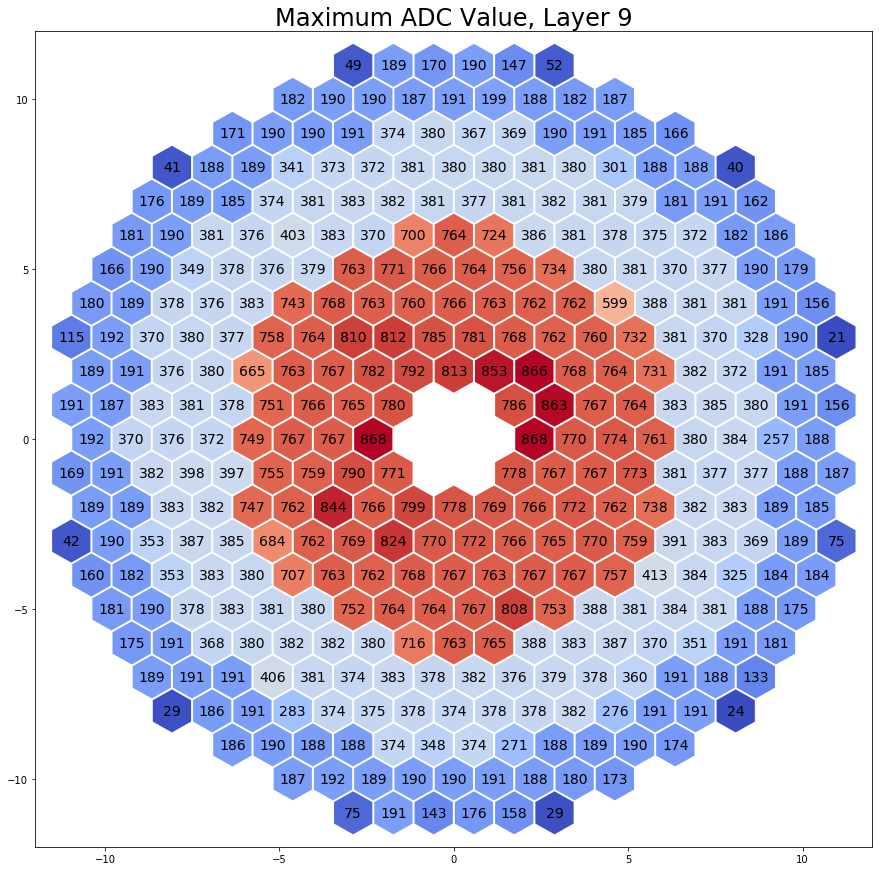

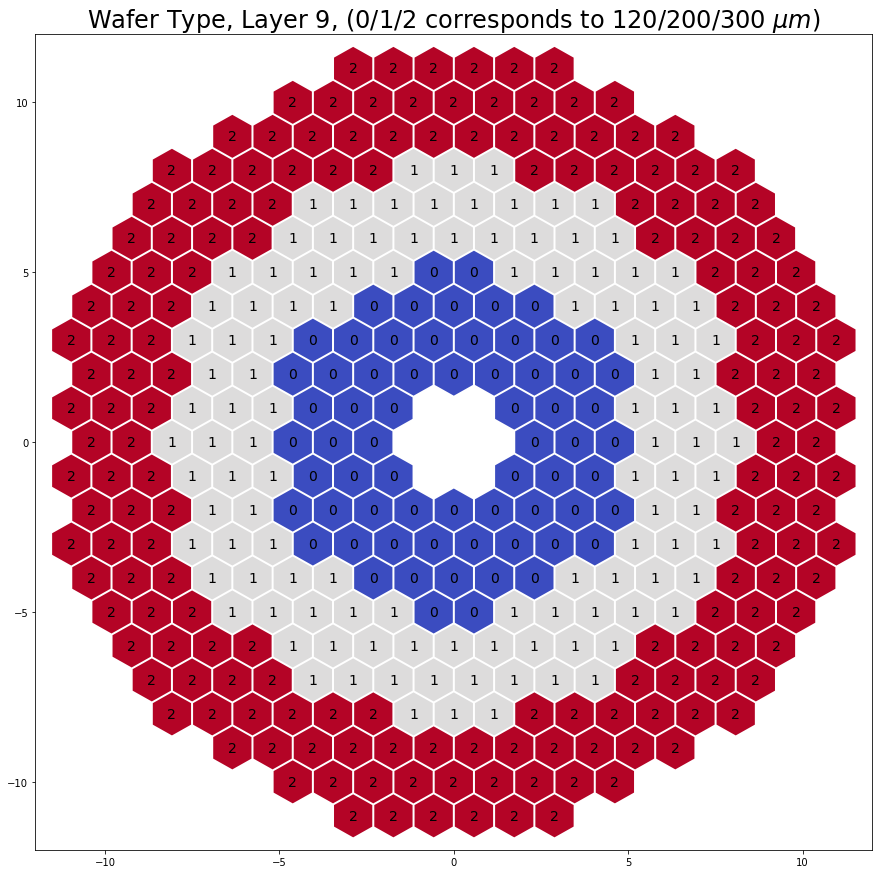

In [17]:
layer=9

wedge = wedges.loc[layer]

for var in ['Max','type']:#,'Occ0','Occ10','OccTOA','OccTOT','BXm1_Occ0','BXm1_Occ10','BXm1_Occ25']:
    makeLayerPlot(wedge,var)


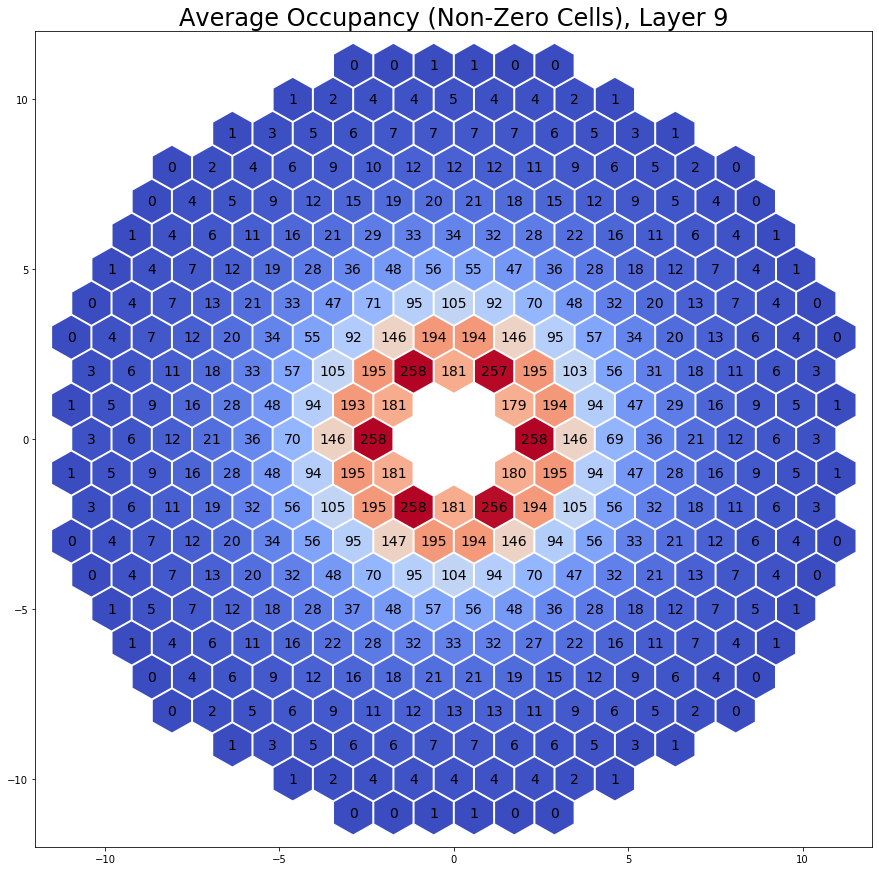

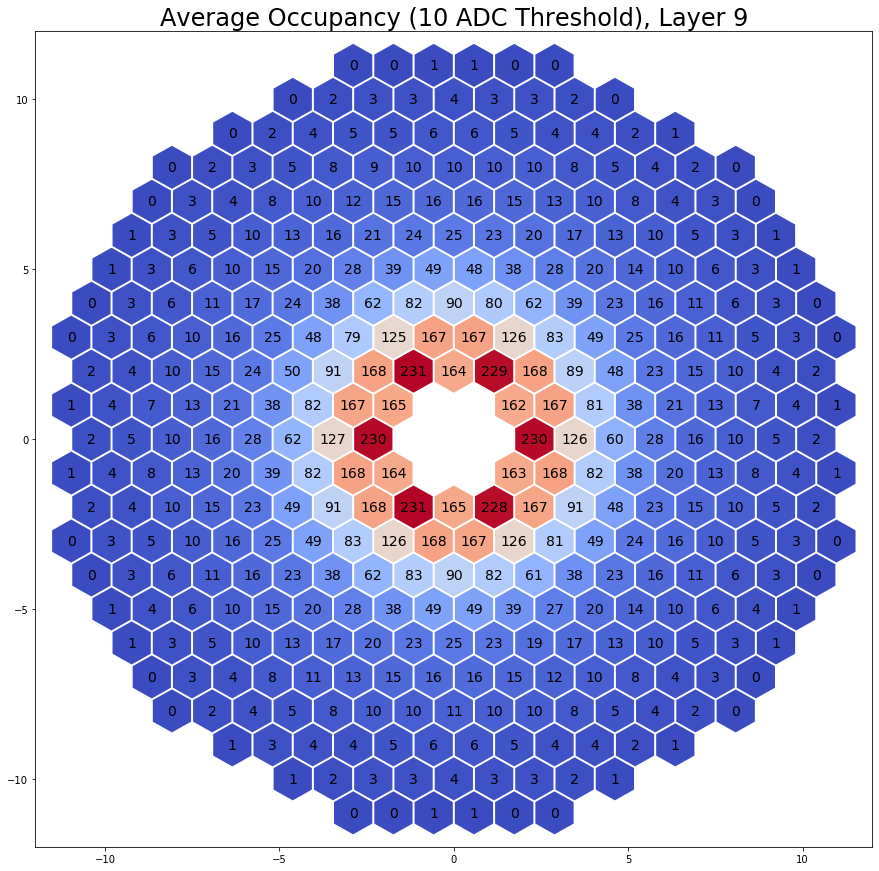

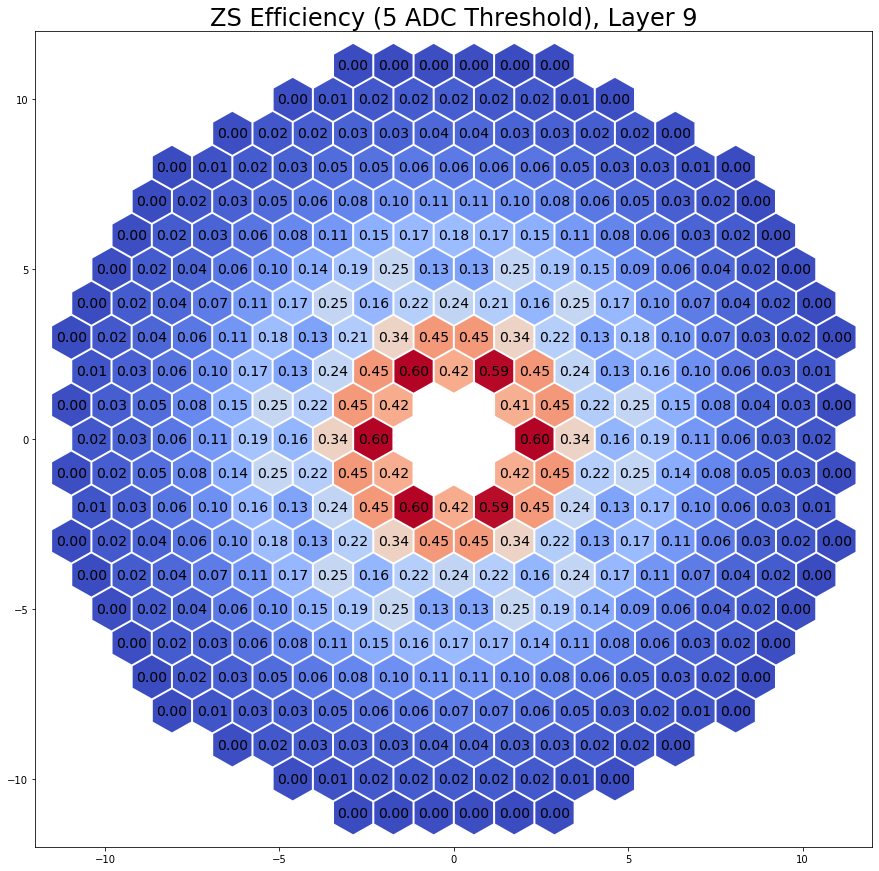

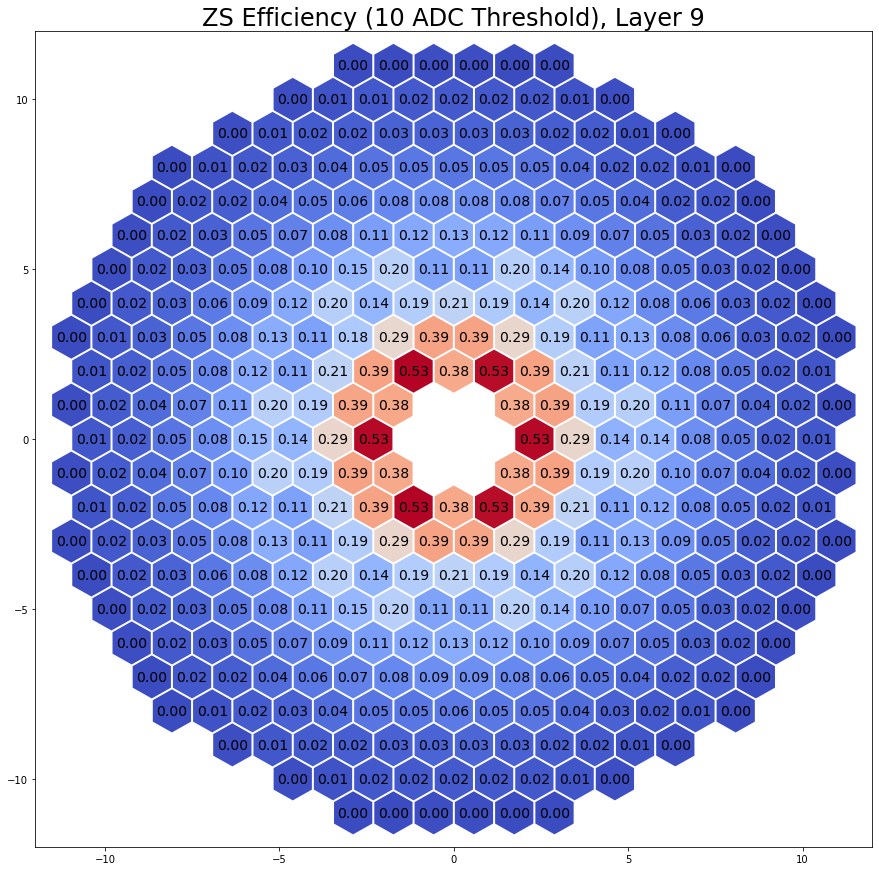

In [18]:
for var in ['Occ0','Occ10','Eff0','Eff10']:
    makeLayerPlot(wedge,var)

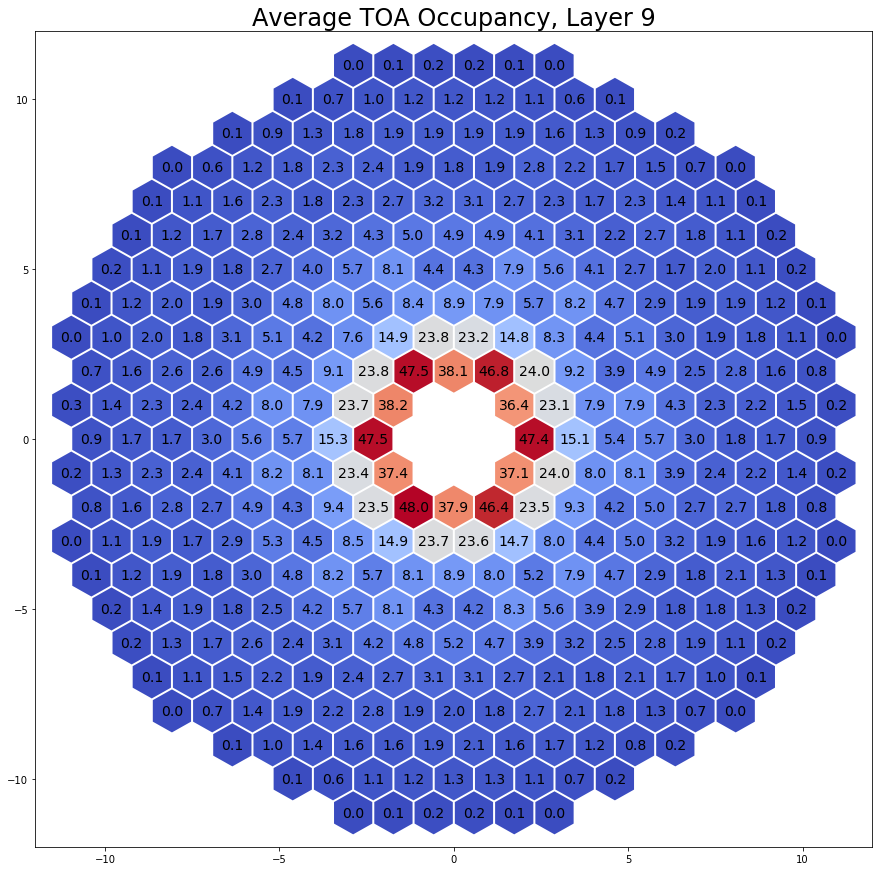

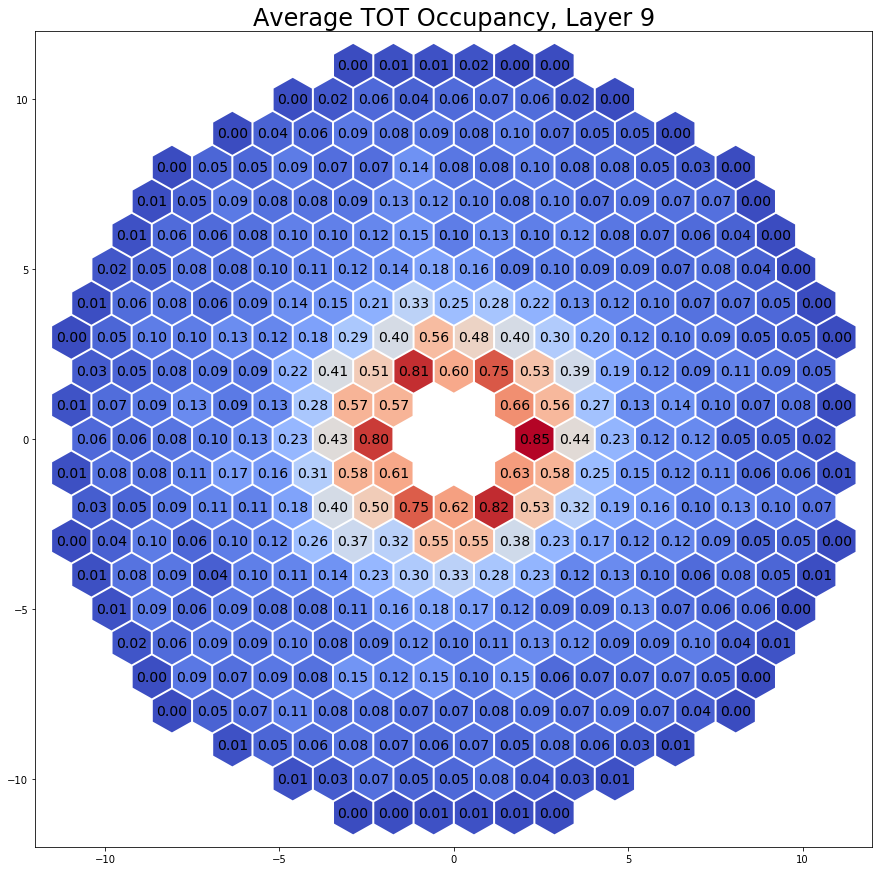

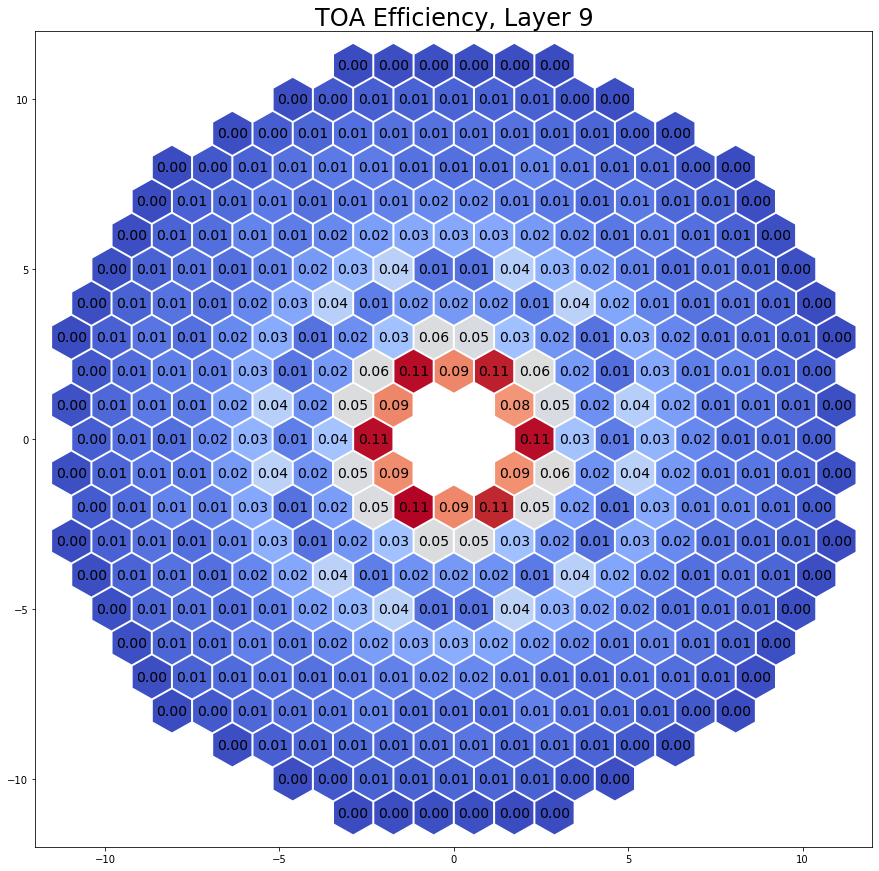

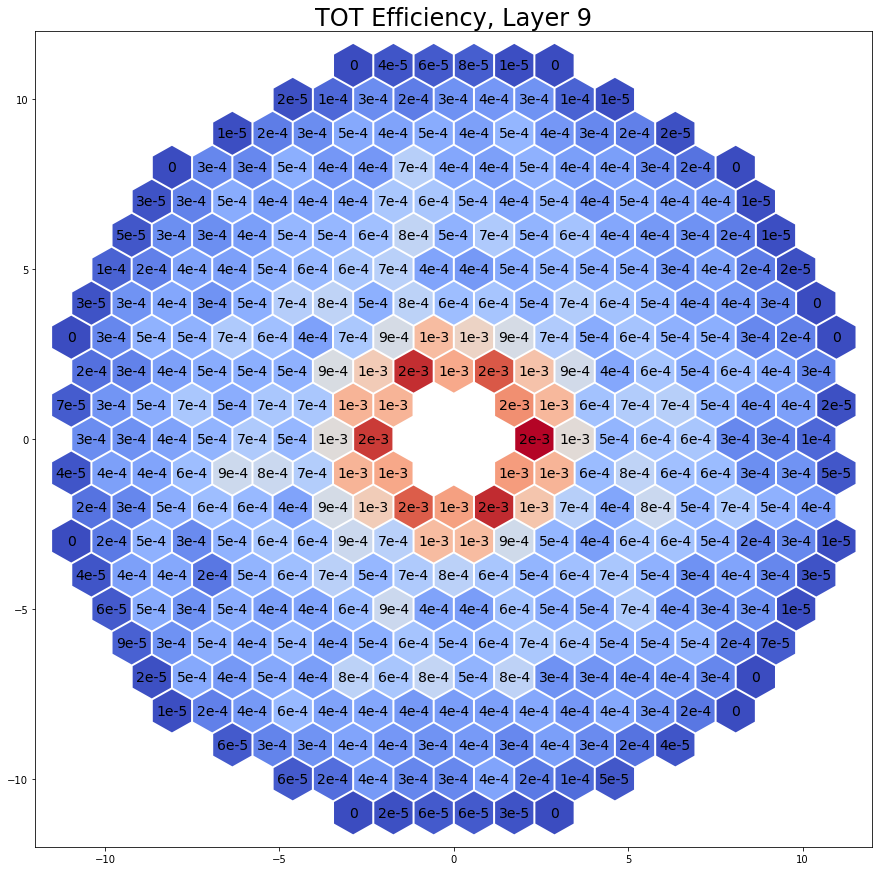

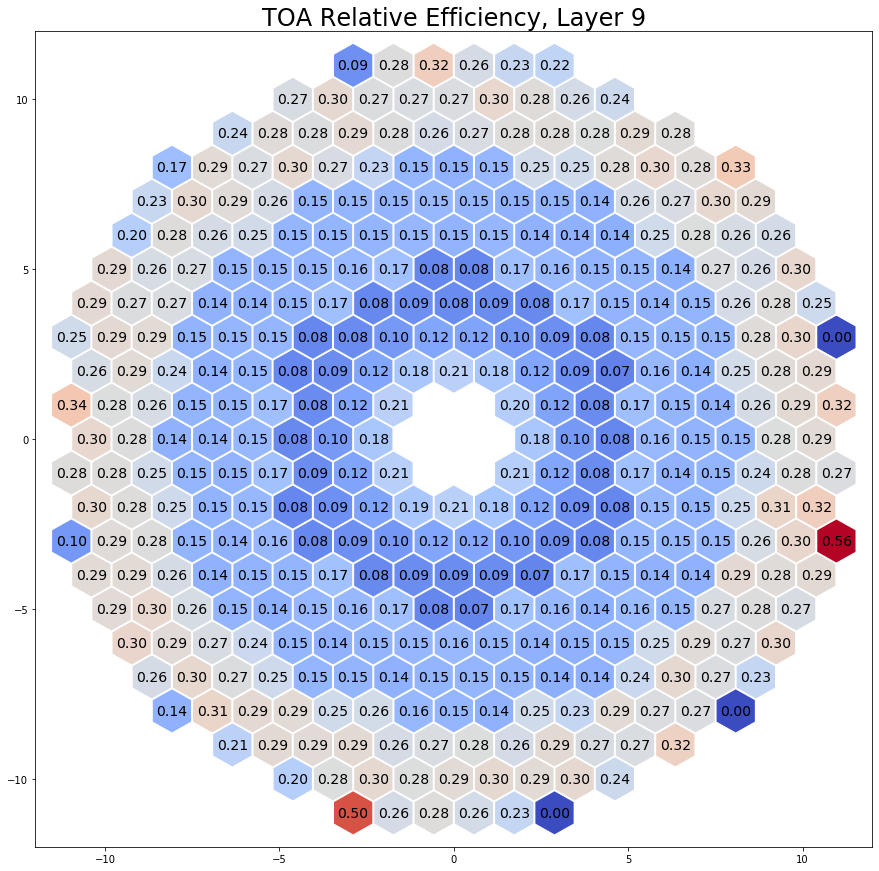

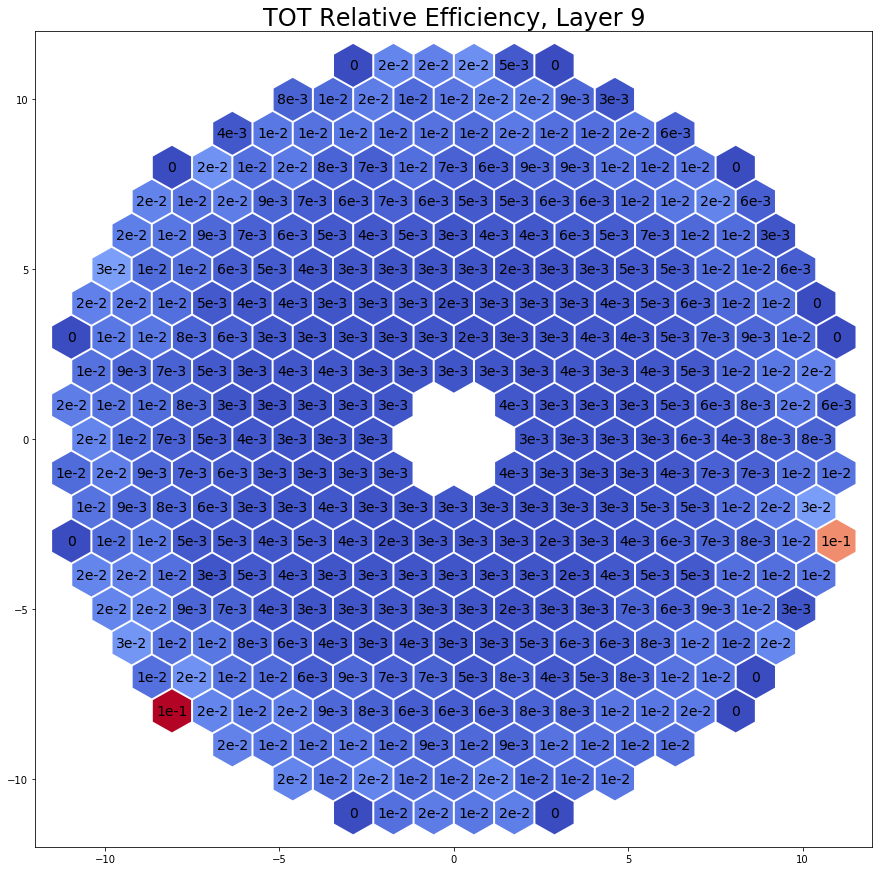

In [19]:
for var in ['OccTOA','OccTOT','EffTOA_total','EffTOT_total','EffTOA_rel','EffTOT_rel']:
    makeLayerPlot(wedge,var)


In [20]:
Labels.keys()

dict_keys(['Eff0', 'Eff10', 'BXm1_Eff0', 'BXm1_Eff10', 'BXm1_Eff25', 'Occ0', 'Occ10', 'BXm1_Occ0', 'BXm1_Occ10', 'BXm1_Occ25', 'OccTOT', 'OccTOA', 'EffTOT_total', 'EffTOA_total', 'EffTOT_rel', 'EffTOA_rel', 'Max', 'type'])

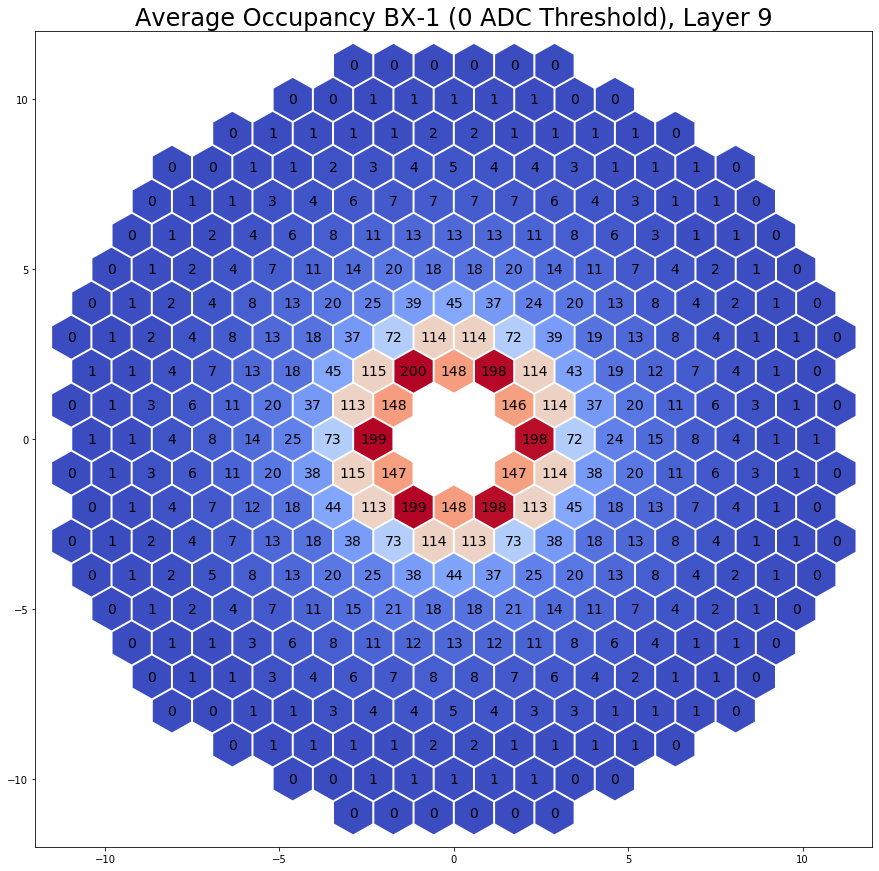

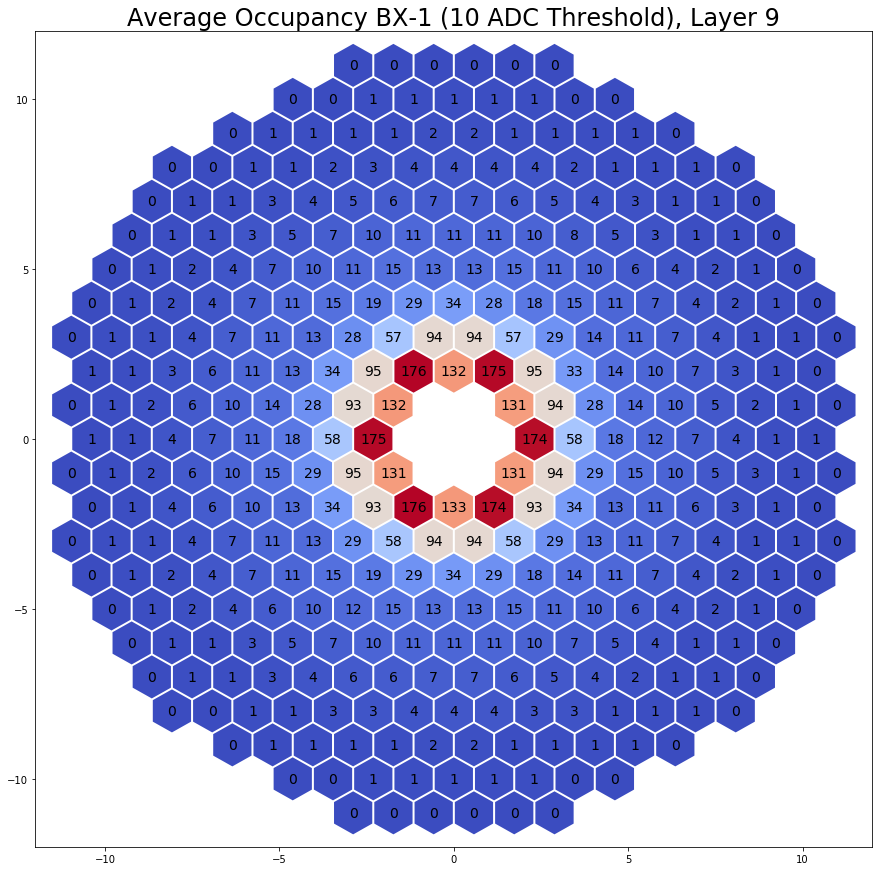

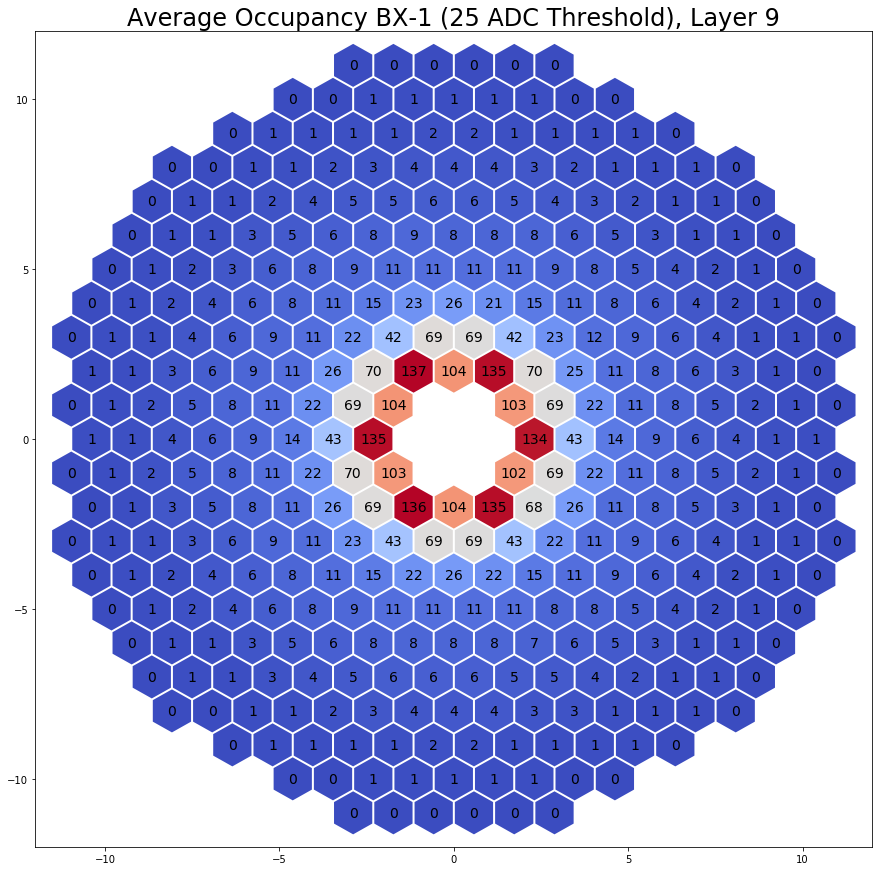

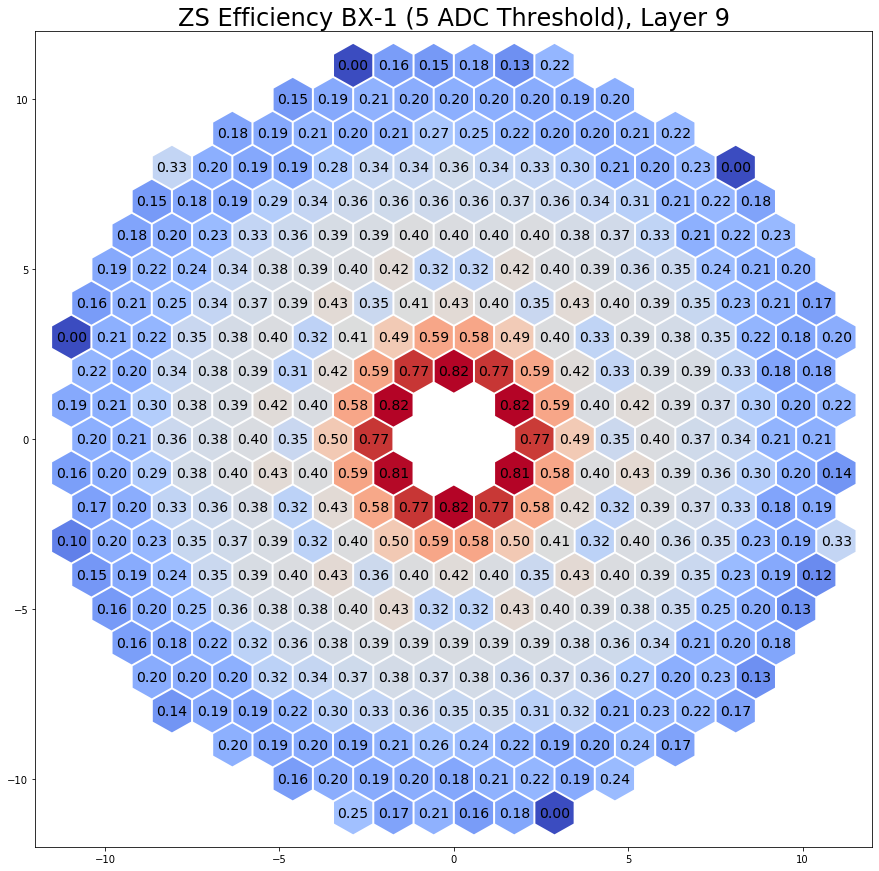

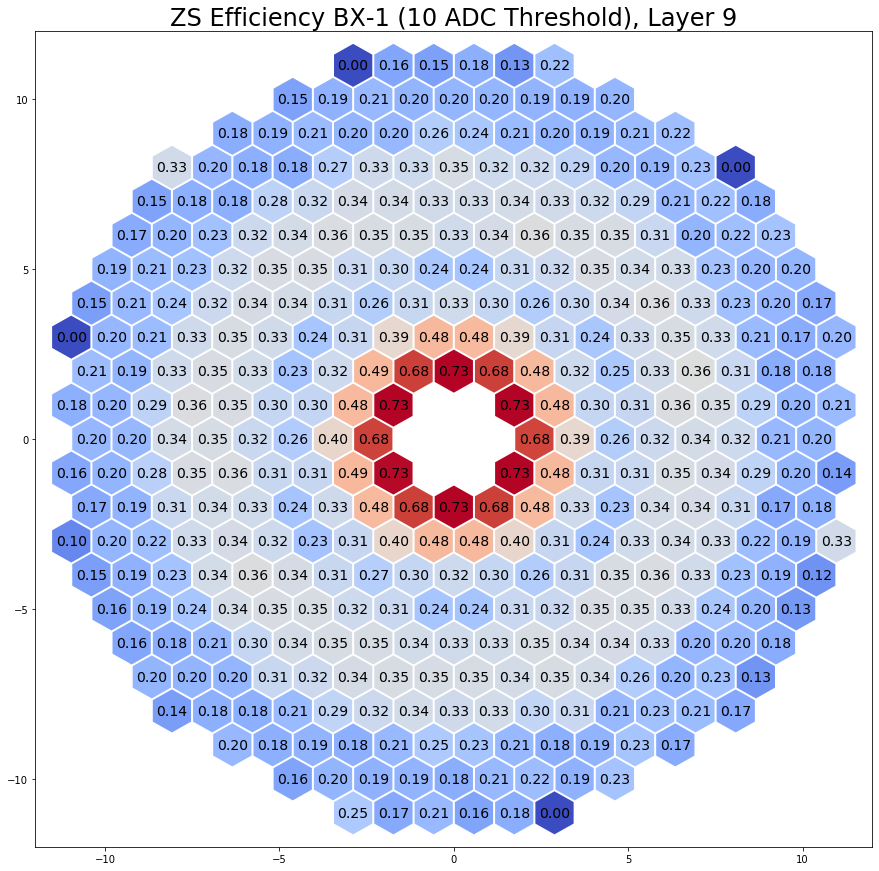

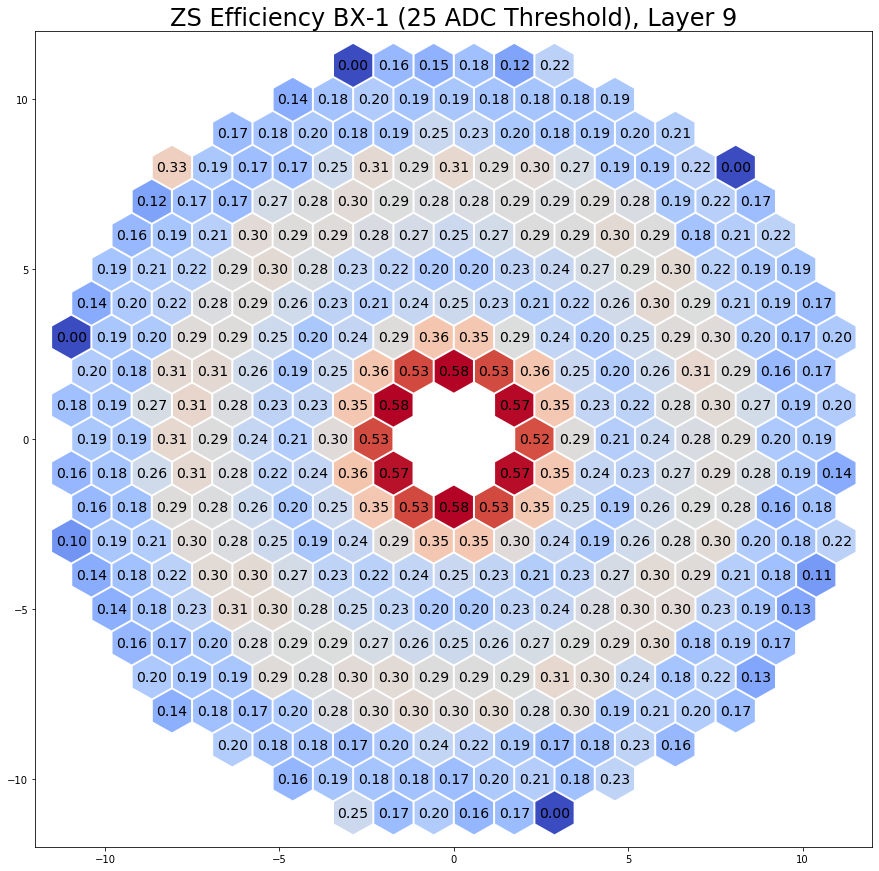

In [21]:
for var in ['BXm1_Occ0', 'BXm1_Occ10', 'BXm1_Occ25','BXm1_Eff0', 'BXm1_Eff10', 'BXm1_Eff25']:
    makeLayerPlot(wedge,var)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4f0701050>]],
      dtype=object)

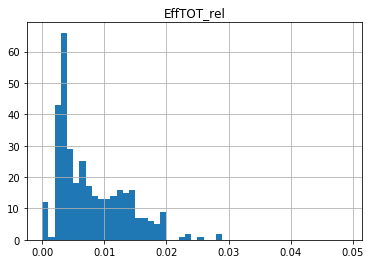

In [22]:
wedges.hist('EffTOT_rel',bins=np.arange(0,.05,.001))

Text(0.5, 0, 'ADC Value')

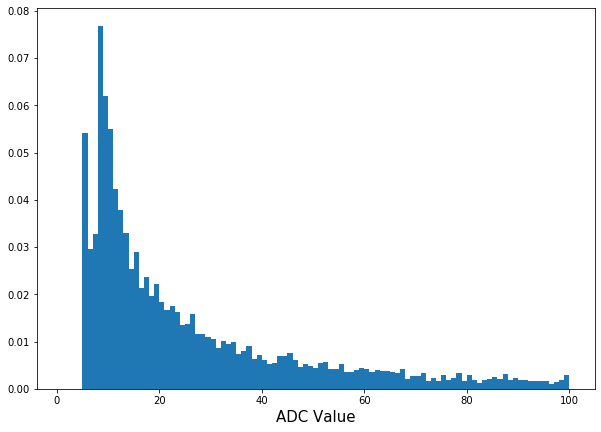

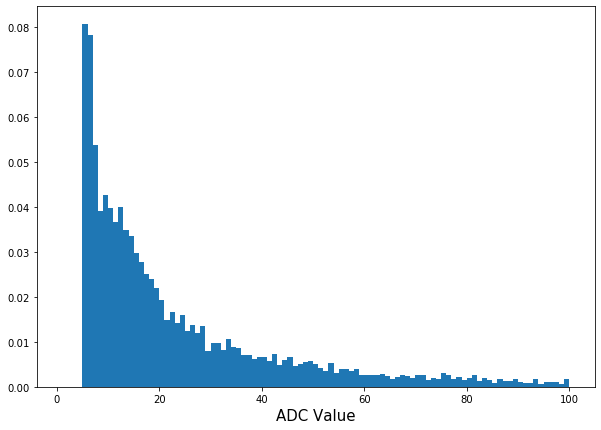

In [23]:
extraCut = (df.waferu==5)&(df.waferv==0)&(df.zside==1)
x = df[extraCut].pivot(index='WaferID',columns='CellID',values='data_BX2').fillna(0)

f,ax = plt.subplots(1,1,figsize=(10,7))
ax.hist(x.values.flatten(),bins=np.arange(1,101),density=True);
ax.set_xlabel('ADC Value',fontsize=15)
# ax.set_yscale('log')
# ax.set_title(f'ADC: {thickness[i]} $\mu m$',fontsize=15)

extraCut = (df.waferu==6)&(df.waferv==1)&(df.zside==1)
x = df[extraCut].pivot(index='WaferID',columns='CellID',values='data_BX2').fillna(0)

f,ax = plt.subplots(1,1,figsize=(10,7))
ax.hist(x.values.flatten(),bins=np.arange(1,101),density=True);
ax.set_xlabel('ADC Value',fontsize=15)
# ax.set_yscale('log')
# ax.set_title(f'ADC: {thickness[i]} $\mu m$',fontsize=15)


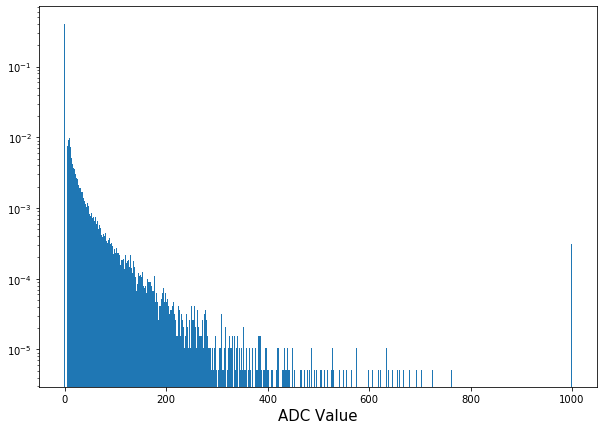

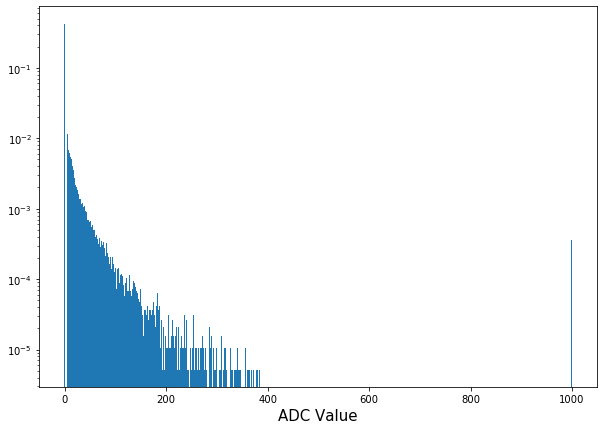

In [24]:
extraCut = (df.waferu==5)&(df.waferv==0)
x = df[extraCut].pivot(index='WaferID',columns='CellID',values='data_BX2').fillna(0)

f,ax = plt.subplots(1,1,figsize=(10,7))
ax.hist(x.values.flatten(),bins=np.arange(-1,1001,2),density=True);
ax.set_xlabel('ADC Value',fontsize=15)
ax.set_yscale('log')
# ax.set_title(f'ADC: {thickness[i]} $\mu m$',fontsize=15)

extraCut = (df.waferu==6)&(df.waferv==1)
x = df[extraCut].pivot(index='WaferID',columns='CellID',values='data_BX2').fillna(0)

f,ax = plt.subplots(1,1,figsize=(10,7))
ax.hist(x.values.flatten(),bins=np.arange(-1,1001,2),density=True);
ax.set_xlabel('ADC Value',fontsize=15)
ax.set_yscale('log')
# ax.set_title(f'ADC: {thickness[i]} $\mu m$',fontsize=15)


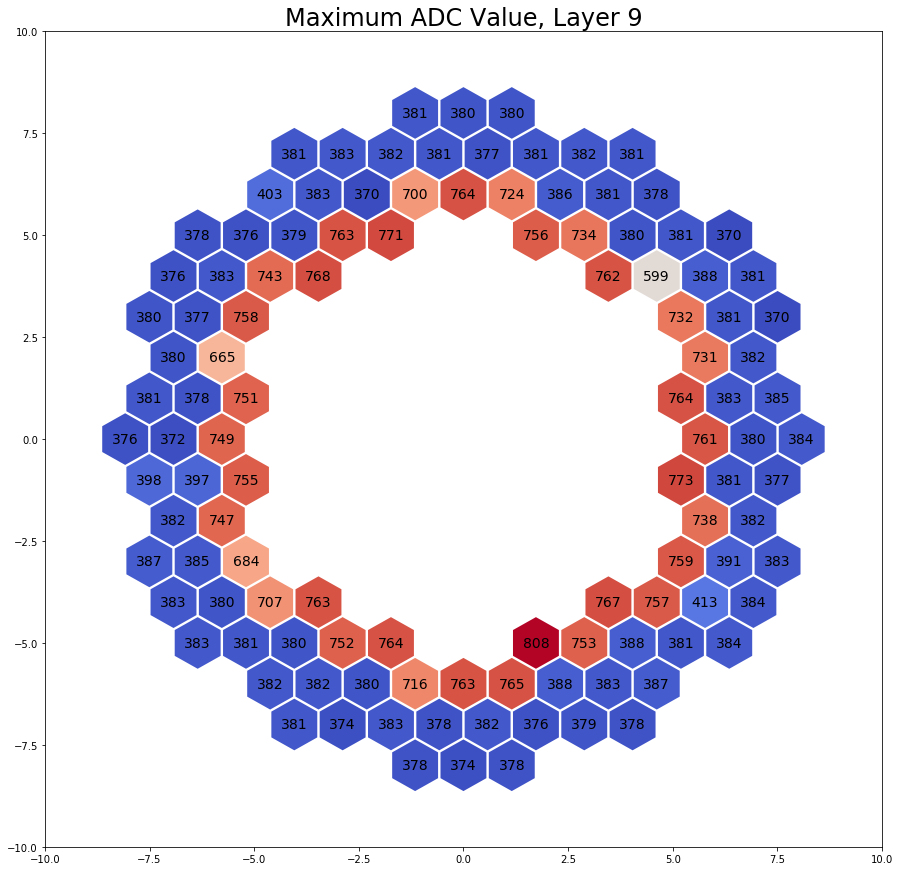

In [25]:
layer=9
var = 'Max'
wedge = wedges.loc[layer]
wedge = wedge.loc[wedge.type==1]

patches = []
for w in wedge.index:
    patches.append(mpatches.RegularPolygon((wedge.loc[w].x,wedge.loc[w].y),6,.95/1.5))
waferCollection = PatchCollection(patches,cmap=matplotlib.cm.coolwarm)
waferCollection.set_array(wedge[var].values)
# waferCollection.set_clim([0,Labels[var]['zMax']])
fig, ax = plt.subplots(figsize=(15,15))
ax.add_collection(waferCollection)
plt.axis([-10,10,-10,10])
plt.title(Labels[var]['Title']%layer,fontsize=24)
for x,y,d in wedge[['x','y',var]].values:
    l = f'%.{Labels[var]["nDec"]}f'%d
    if var=='TOT': l = '{:.0e}'.format(d).replace('e-0','e-').replace('0e+00','0')
    plt.text(x,y,l,fontsize=14,horizontalalignment='center',verticalalignment='center')
